In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis

In [2]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import docx

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)


In [3]:
# Getting the data frame

results_clean = []
df = pd.read_csv("sentiments_12_19_2023.csv", low_memory=False)

print(df)

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx  0.170200
1     Abn_Barlow_05_Autism_v2.docx  0.174810
2     Abn_Barlow_06_Autism_v2.docx  0.151860
3        Abn_Barlow_07_Autism.docx  0.181993
4        Abn_Barlow_08_Autism.docx  0.201383
..                             ...       ...
203  Spcl_Vaughn_03_Autism_v2.docx  0.236148
204  Spcl_Vaughn_04_Autism_v2.docx  0.393215
205  Spcl_Vaughn_05_Autism_v2.docx  0.331434
206  Spcl_Vaughn_06_Autism_v2.docx  0.332699
207     Spcl_Vaughn_07_Autism.docx  0.307140

[208 rows x 2 columns]


                          Textbook     Score  Author Field
0     Abn_Barlow_04_Autism_v2.docx  0.170200  Barlow   Abn
1     Abn_Barlow_05_Autism_v2.docx  0.174810  Barlow   Abn
2     Abn_Barlow_06_Autism_v2.docx  0.151860  Barlow   Abn
3        Abn_Barlow_07_Autism.docx  0.181993  Barlow   Abn
4        Abn_Barlow_08_Autism.docx  0.201383  Barlow   Abn
..                             ...       ...     ...   ...
203  Spcl_Vaughn_03_Autism_v2.docx  0.236148  Vaughn  Spcl
204  Spcl_Vaughn_04_Autism_v2.docx  0.393215  Vaughn  Spcl
205  Spcl_Vaughn_05_Autism_v2.docx  0.331434  Vaughn  Spcl
206  Spcl_Vaughn_06_Autism_v2.docx  0.332699  Vaughn  Spcl
207     Spcl_Vaughn_07_Autism.docx  0.307140  Vaughn  Spcl

[208 rows x 4 columns]


Text(0.5, 1.0, 'Scores by Field')

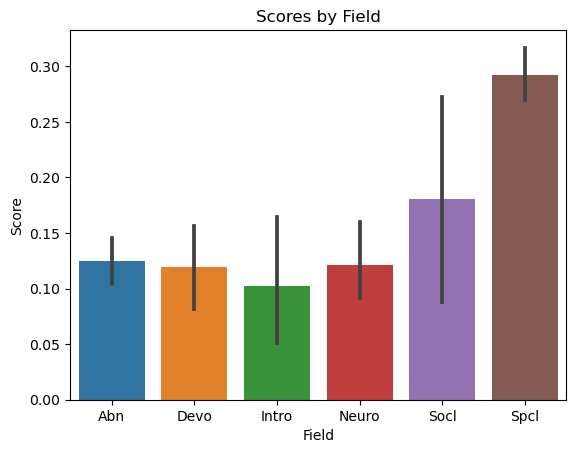

In [5]:
# Field Analysis

# Break up the data frame into fields

# field_df = df

# all_fields = []

# fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*"]

# for field in fields_regex:
#     field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
#     all_fields.append(field_l)


# # Find average score per field

# field_means = []
# for f_df in all_fields:
#     field_name = ""
#     for field in fields_regex:
#         if len(f_df[f_df["Textbook"].str.contains(field, regex=True)]) > 0:
#             field_name = field[:(len(field_name)-2)] # Ignore ".*"
#     field_mean =  f_df["Score"].mean()
#     field_means.append([field_name, field_mean])
    
    
# field_means_df = pd.DataFrame(field_means, columns=["Field", "Mean_Score"])
# field_means_df = field_means_df.sort_values("Mean_Score")

# fig, ax = plt.subplots()

# sns.barplot(ax = ax,
#     data=field_means_df, x="Field", y="Mean_Score"
# )

# ax.set_title("Scores by Field")

# Field Analysis

# Break up the data frame into fields

field_df = df

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn"]


for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

# mean = field_df.groupby('Field')['Score'].mean()
# std = field_df.groupby('Field')['Score'].std()

fig, ax = plt.subplots()

print(field_df)

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")

Text(0.5, 1.0, 'Scores by Spcl Author')

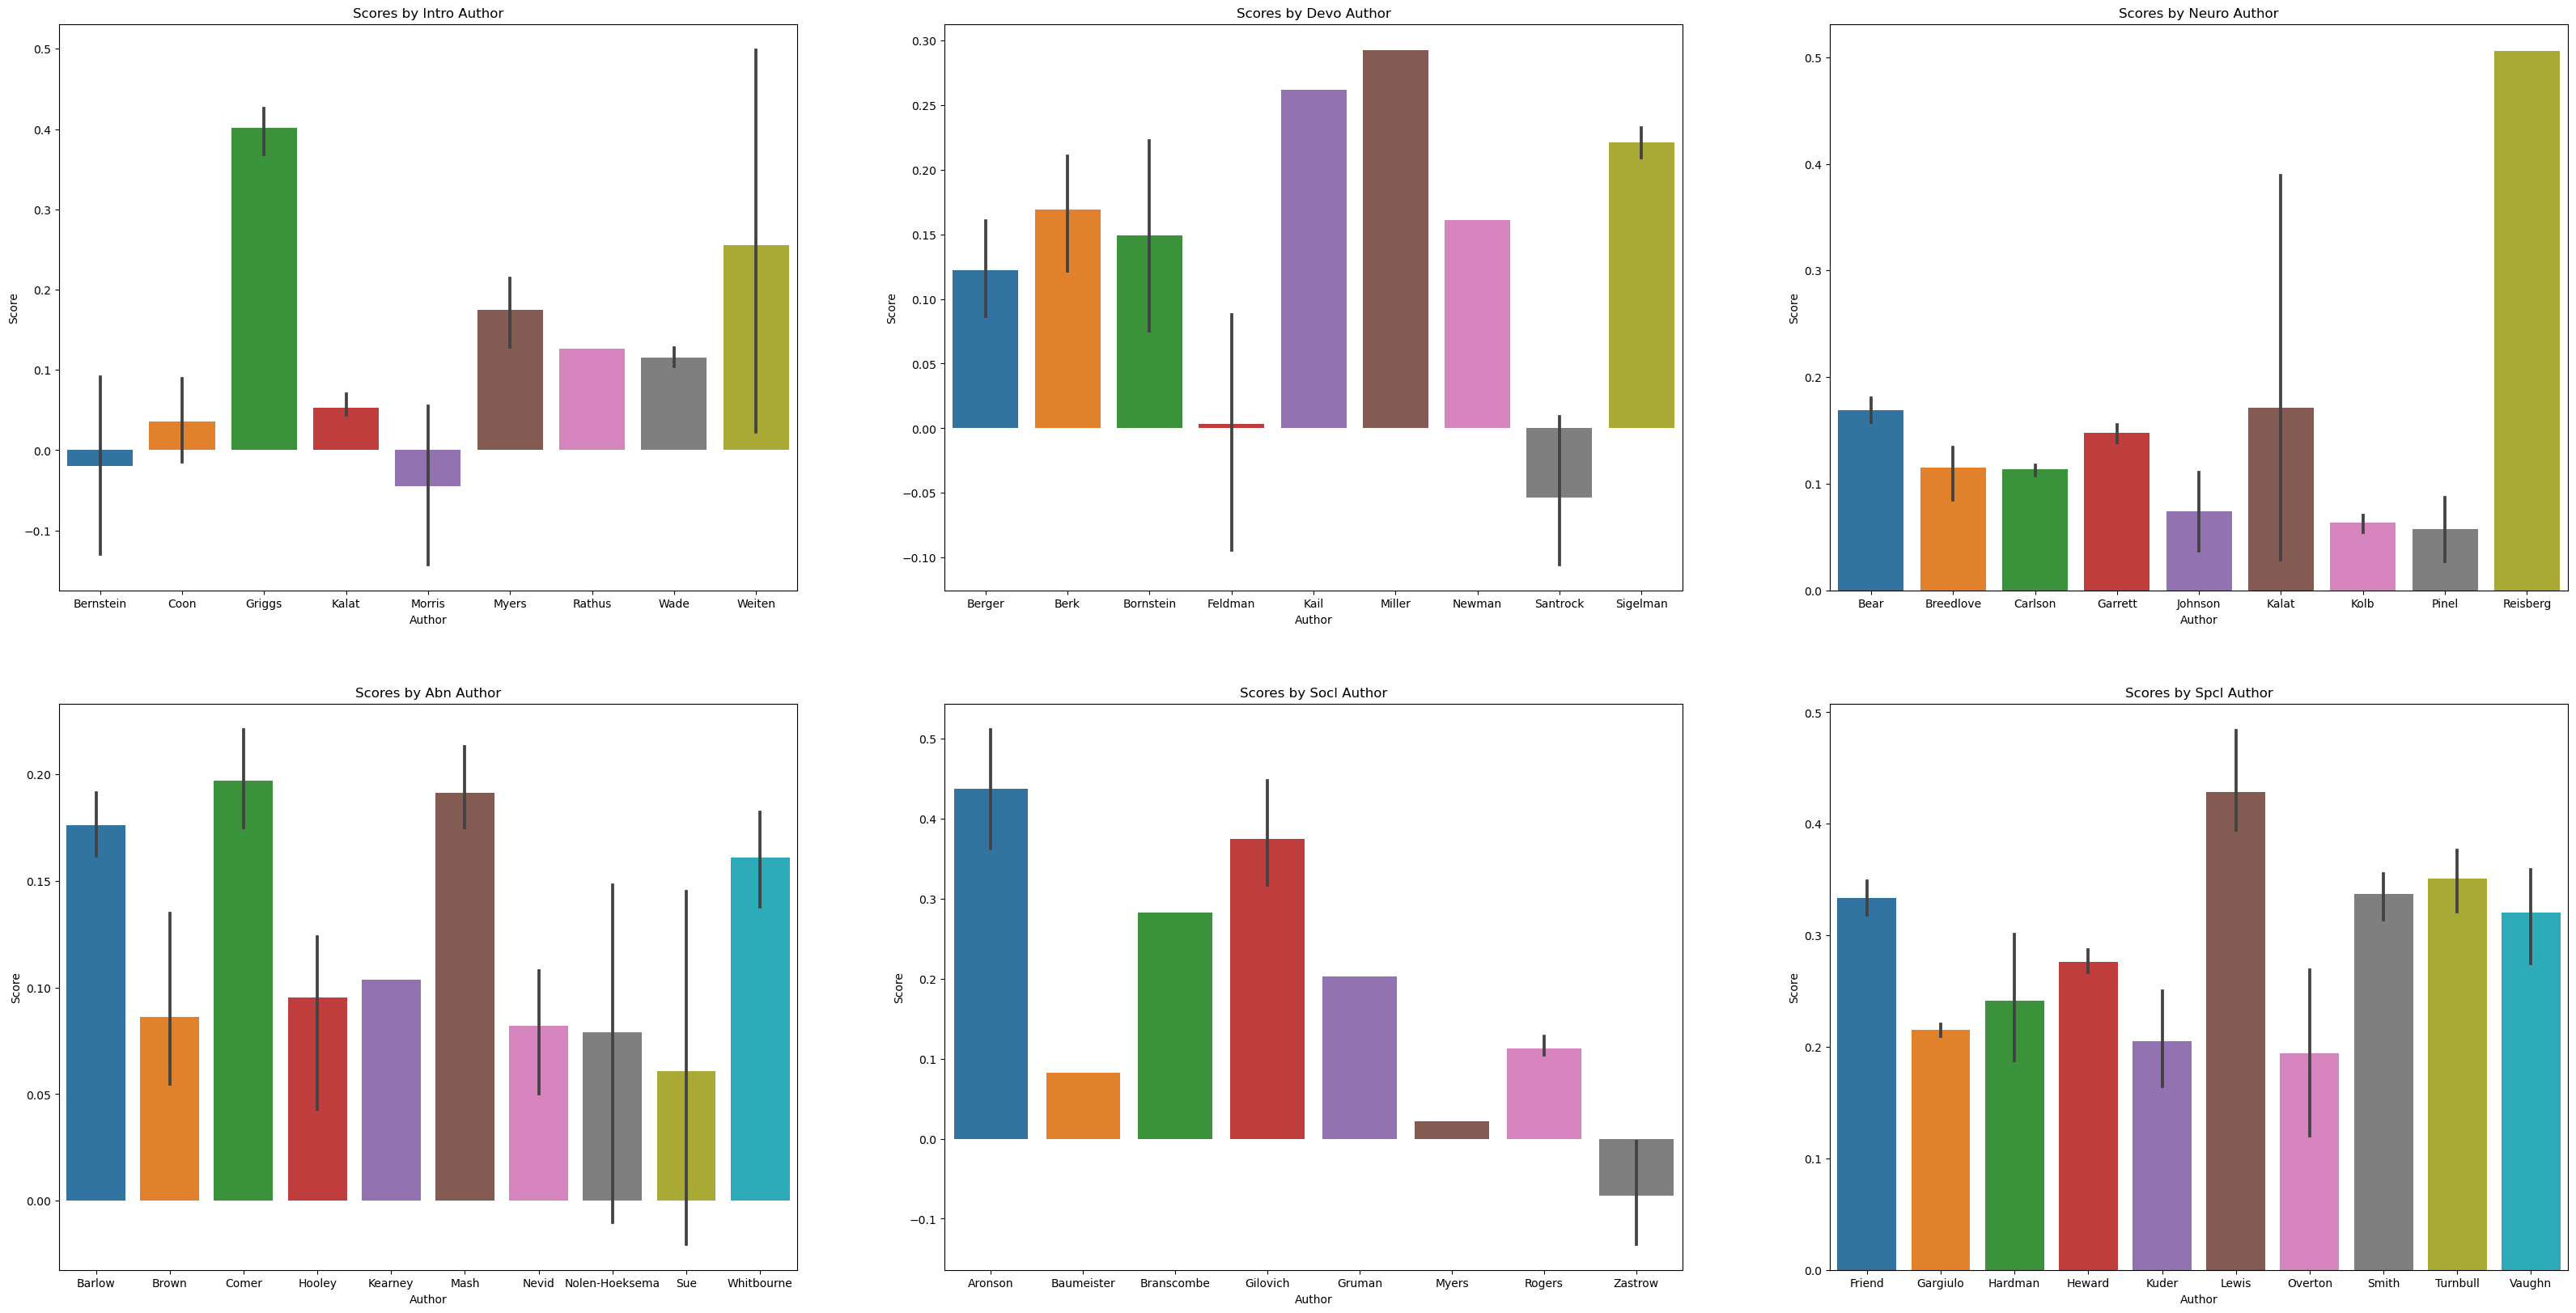

In [6]:
# # Author Analysis

# # Break up dataframe into authors

# author_df = df
# # print(author_df)

# all_authors = []

# authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
#                  "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Newman", "Santrock", 
#                  "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
#                  "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
#                  "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
#                  "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn"]

# summy = 0
# for author in authors:
#     author_l = author_df[author_df["Textbook"].str.contains(author)]
# #     print(author_l)
#     summy += len(author_l)
#     all_authors.append(author_l)
    
# print(summy)
# # Find average score per field

# author_means = []
# for a_df in all_authors:
#     author_name = ""
#     field = ""
#     for author in authors:
#         if len(a_df[a_df["Textbook"].str.contains(author)]) > 0:
#             author_name = author 
#             if len(a_df[a_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
#                 chunk = author_df[author_df["Textbook"].str.contains(author)]
#                 line = chunk["Textbook"].values[0]
#                 field = line.split("_")[0]
#     author_mean =  a_df["Score"].mean()
#     author_means.append([author_name, field, author_mean])
    
# author_means_df = pd.DataFrame(author_means, columns=["Author", "Field", "Mean_Score"])
# author_means_df = author_means_df.sort_values("Mean_Score")

# print(author_means_df)

# fig, ax = plt.subplots(2, 3, figsize = (40,20))

# sns.barplot(ax = ax[0][0],
#     data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Mean_Score"
# )
# sns.barplot(ax = ax[0][1],
#     data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Mean_Score"
# )
# sns.barplot(ax = ax[0][2],
#     data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Mean_Score"
# )
# sns.barplot(ax = ax[1][0],
#     data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Mean_Score"
# )
# sns.barplot(ax = ax[1][1],
#     data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Mean_Score"
# )
# sns.barplot(ax = ax[1][2],
#     data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Mean_Score"
# )

# ax[0][0].set_title("Scores by Intro Author")
# ax[0][1].set_title("Scores by Devo Author")
# ax[0][2].set_title("Scores by Neuro Author")
# ax[1][0].set_title("Scores by Abn Author")
# ax[1][1].set_title("Scores by Socl Author")
# ax[1][2].set_title("Scores by Spcl Author")

# Author Analysis

# Break up dataframe into authors

author_df = field_df
# print(author_df)

all_authors = []

# authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
#                  "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Newman", "Santrock", 
#                  "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
#                  "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
#                  "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
#                  "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn"]

# summy = 0
for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
#     print(author_l)
#     summy += len(author_l)
    all_authors.append(author_l)
    
# print(summy)
# # Find average score per field

# author_means = []
# for a_df in all_authors:
#     author_name = ""
#     field = ""
#     for author in authors:
#         if len(a_df[a_df["Textbook"].str.contains(author)]) > 0:
#             author_name = author 
#             if len(a_df[a_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
#                 chunk = author_df[author_df["Textbook"].str.contains(author)]
#                 line = chunk["Textbook"].values[0]
#                 field = line.split("_")[0]
#     author_mean =  a_df["Score"].mean()
#     author_means.append([author_name, field, author_mean])
    
# author_means_df = pd.DataFrame(author_means, columns=["Author", "Field", "Mean_Score"])
# author_means_df = author_means_df.sort_values("Mean_Score")

# print(author_means_df)

author_means_df = author_df

fig, ax = plt.subplots(2, 3, figsize = (40,20))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][2],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][2],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Intro Author")
ax[0][1].set_title("Scores by Devo Author")
ax[0][2].set_title("Scores by Neuro Author")
ax[1][0].set_title("Scores by Abn Author")
ax[1][1].set_title("Scores by Socl Author")
ax[1][2].set_title("Scores by Spcl Author")

C:\Users\maksi\AppData\Local\Temp\ipykernel_4300\3601096807.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_4300\3601096807.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_4300\3601096807.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

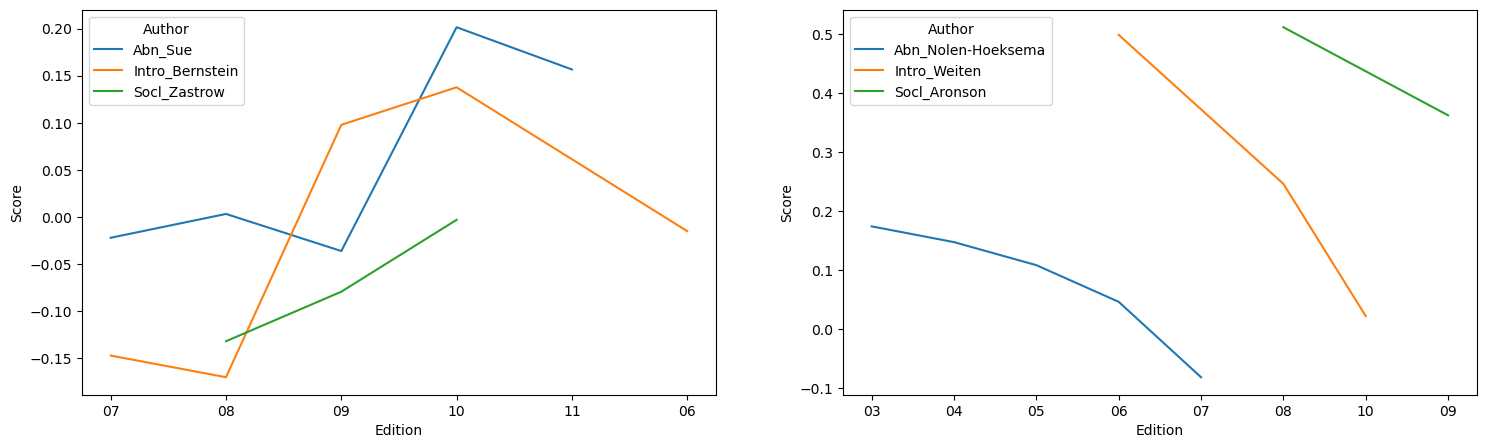

In [6]:
# Edition Analysis

edition_df = df

# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
#     print(a_df)
    res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
    for l in alphabetical:
        if len(alphabetical) > 1:
            slope.append(res.slope)
        else:
            slope.append(0)
#     if len(a_df) > 1 and res.slope < -0.01:
#         sns.lineplot(data=a_df, x="Edition", y="Score")

edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope
# print(edition_df)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] > 0.055]
sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high)

low = edition_df[edition_df["Slope"] <= -0.055]
sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

plt.show()


      Year     Score
1988  1988  0.027508
1992  1992  0.041204
1995  1995  0.066107
1996  1996  0.113149
1997  1997  0.029464
1998  1998  0.251841
1999  1999  0.149430
2000  2000  0.187926
2001  2001  0.132148
2002  2002  0.211552
2003  2003  0.166705
2004  2004  0.221380
2005  2005  0.105718
2006  2006  0.170579
2007  2007  0.134726
2008  2008  0.102073
2009  2009  0.063672
2010  2010  0.187881
2011  2011  0.148568
2012  2012  0.189242
2013  2013  0.174613
2014  2014  0.154547
2015  2015  0.146348
2016  2016  0.262821
2017  2017  0.121328
2018  2018  0.209102


Text(0.5, 1.0, 'Mean Textbook Score Throughout Years')

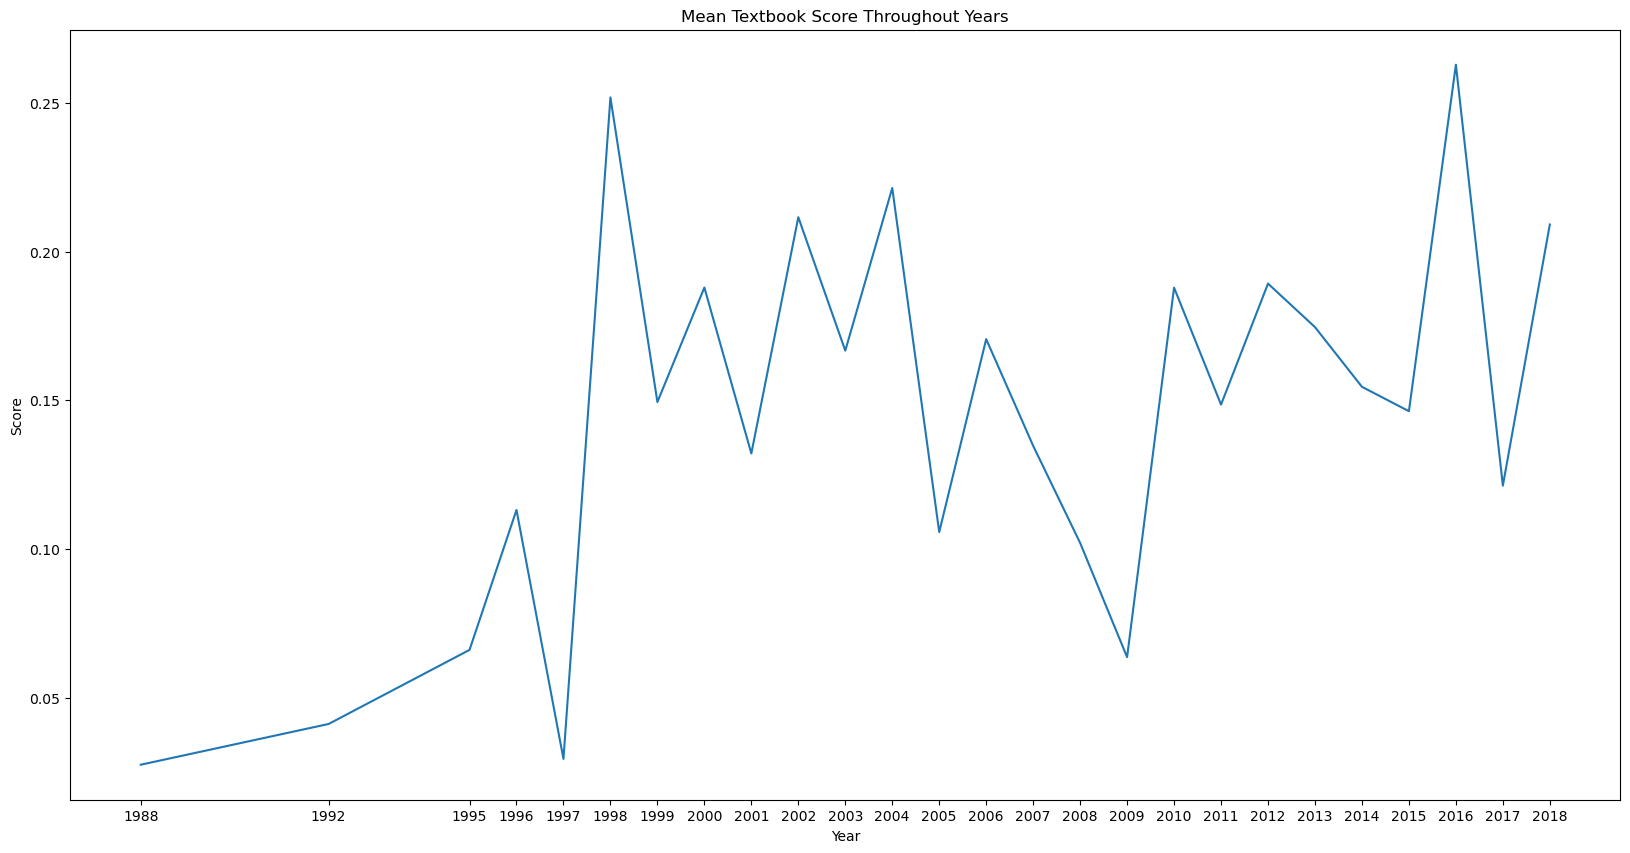

In [7]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
#     print(book)
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    year = no_parentheses.split(",")[1]
#     print(year)
    year = int(year)
    book_years[book] = year

# print(book_years)

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    
# print(year_textbooks)

# Find mean of the books in each year

# print(year_df)
year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]
    
# print(year_scores)

# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

print(graphing_years)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")

In [8]:
# Does length of passage matter?

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with text for all the books, minus the titles
title_text = {}
for book in textbooks:
    total_text = getText(book)
    text_without_title = total_text[4:]
    for piece in text_without_title:
        if piece == '':
            text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
#     text_without_title.remove('')
    title_text[book] = text_without_title
    
    
# Remove stop words from each book

stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

os.chdir(stopwords_dir)

f = open("stop_words_english_original.txt", "r", encoding="utf-8")
stopwords = []
for text in f:
    text = text.replace('\n', '')
    stopwords.append(text)


punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# Function to clean up text and remove stopwords
def clean(book):
    text_list = title_text[book]
    new_text_list = []
    
    # Clean up text
    for text in text_list:
        text = text.strip()
        text = text.lower()
        text = text.split(' ')
        new_text_list.append(text)


    newer_text_list = []
    
    # Remove punctuation
    for sentence in new_text_list:
        for word in sentence:
            for char in punc:
                if char in word:
                    word = word.replace(char, '')
            newer_text_list.append(word)
                
    # Remove stop words
    newest_text_list = []
    for words in newer_text_list:
        if words not in stopwords:
            newest_text_list.append(words)

    # Remove blanks
    for w in newest_text_list:
        if len(w) == 0:
            newest_text_list.remove(w)
            
    return newest_text_list

# Update all the books with their clean, stopword-less counterparts

clean_texts = {}
for book in title_text:
    newest_text_list = clean(book)
    clean_texts[book] = newest_text_list
    
# Find length of all texts
lengths = {}
for book in clean_texts:
    length_of_text = len(clean_texts[book])
    lengths[book] = length_of_text
    
print(lengths)

{'Abn_Barlow_04_Autism_v2.docx': 3118, 'Abn_Barlow_05_Autism_v2.docx': 2556, 'Abn_Barlow_06_Autism_v2.docx': 2421, 'Abn_Barlow_07_Autism.docx': 2132, 'Abn_Barlow_08_Autism.docx': 4852, 'Abn_Brown_01_Autism_v2.docx': 1813, 'Abn_Brown_02_Autism_v2.docx': 1853, 'Abn_Brown_03_Autism_v2.docx': 1755, 'Abn_Brown_04_Autism_v2.docx': 1823, 'Abn_Brown_05_Autism.docx': 1791, 'Abn_Comer_05_Autism_v2.docx': 1454, 'Abn_Comer_06_Autism_v2.docx': 2327, 'Abn_Comer_07_Autism_v2.docx': 2421, 'Abn_Comer_08_Autism_v2.docx': 2001, 'Abn_Comer_09_Autism.docx': 2498, 'Abn_Hooley_13_Autism_v2.docx': 1753, 'Abn_Hooley_14_Autism_v2.docx': 1660, 'Abn_Hooley_15_Autism_v2.docx': 1948, 'Abn_Hooley_16_Autism_v2.docx': 1656, 'Abn_Hooley_17_Autism.docx': 2285, 'Abn_Kearney_06_Autism.docx': 1181, 'Abn_Mash_02_Autism_v2.docx': 7464, 'Abn_Mash_03_Autism_v2.docx': 7286, 'Abn_Mash_04_Autism_v2.docx': 7860, 'Abn_Mash_05_Autism_v2.docx': 9689, 'Abn_Mash_06_Autism.docx': 13131, 'Abn_Nevid_06_Autism_v2.docx': 1321, 'Abn_Nevid_07

In [9]:
print(max(lengths.values()))

13131


In [10]:
df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

In [11]:
length_df = df
print(length_df)

# Add the lengths of the books to the dataframe
length_df["Length"] = length_df["Textbook"].map(lengths)

print(length_df[length_df["Length"] > 4000])

                          Textbook     Score Edition       Author     Slope  \
0     Abn_Barlow_04_Autism_v2.docx  0.170200      04   Abn_Barlow  0.006955   
1     Abn_Barlow_05_Autism_v2.docx  0.174810      05   Abn_Barlow  0.006955   
2     Abn_Barlow_06_Autism_v2.docx  0.151860      06   Abn_Barlow  0.006955   
3        Abn_Barlow_07_Autism.docx  0.181993      07   Abn_Barlow  0.006955   
4        Abn_Barlow_08_Autism.docx  0.201383      08   Abn_Barlow  0.006955   
..                             ...       ...     ...          ...       ...   
203  Spcl_Vaughn_03_Autism_v2.docx  0.236148      03  Spcl_Vaughn  0.008147   
204  Spcl_Vaughn_04_Autism_v2.docx  0.393215      04  Spcl_Vaughn  0.008147   
205  Spcl_Vaughn_05_Autism_v2.docx  0.331434      05  Spcl_Vaughn  0.008147   
206  Spcl_Vaughn_06_Autism_v2.docx  0.332699      06  Spcl_Vaughn  0.008147   
207     Spcl_Vaughn_07_Autism.docx  0.307140      07  Spcl_Vaughn  0.008147   

    Field  
0     Abn  
1     Abn  
2     Abn  
3  

Text(0.5, 1.0, 'Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)')

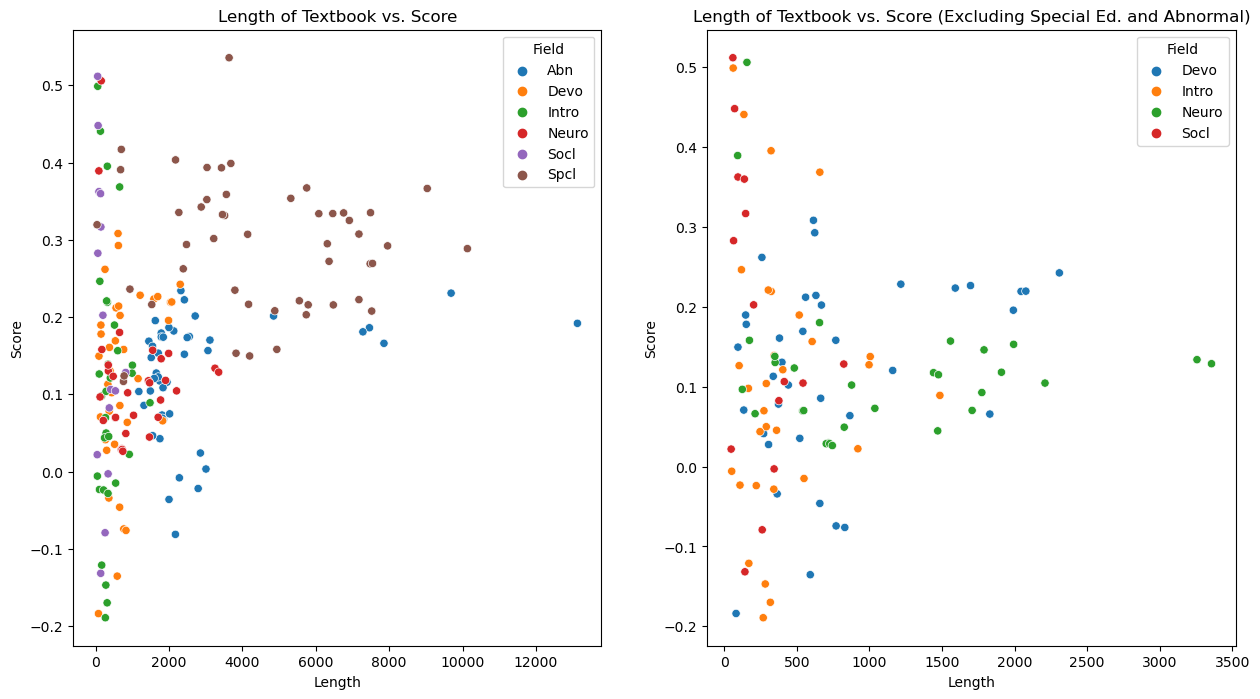

In [12]:


# Correlation between score and length?
fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
ax[0].set_title("Length of Textbook vs. Score")

# Remove special education and abnormal
secondary_df = length_df[length_df["Field"] != "Spcl"]
tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

                          Textbook    Raw_Score
0     Abn_Barlow_04_Autism_v2.docx   530.683081
1     Abn_Barlow_05_Autism_v2.docx   446.814646
2     Abn_Barlow_06_Autism_v2.docx   367.654040
3        Abn_Barlow_07_Autism.docx   388.010101
4        Abn_Barlow_08_Autism.docx   977.109343
..                             ...          ...
203  Spcl_Vaughn_03_Autism_v2.docx   221.506566
204  Spcl_Vaughn_04_Autism_v2.docx  1349.515152
205  Spcl_Vaughn_05_Autism_v2.docx  1166.316667
206  Spcl_Vaughn_06_Autism_v2.docx  1151.137374
207     Spcl_Vaughn_07_Autism.docx  1273.403535

[208 rows x 2 columns]


Text(0.5, 1.0, 'Length of Textbook vs. Raw Score (Excluding Special Ed. and Abnormal)')

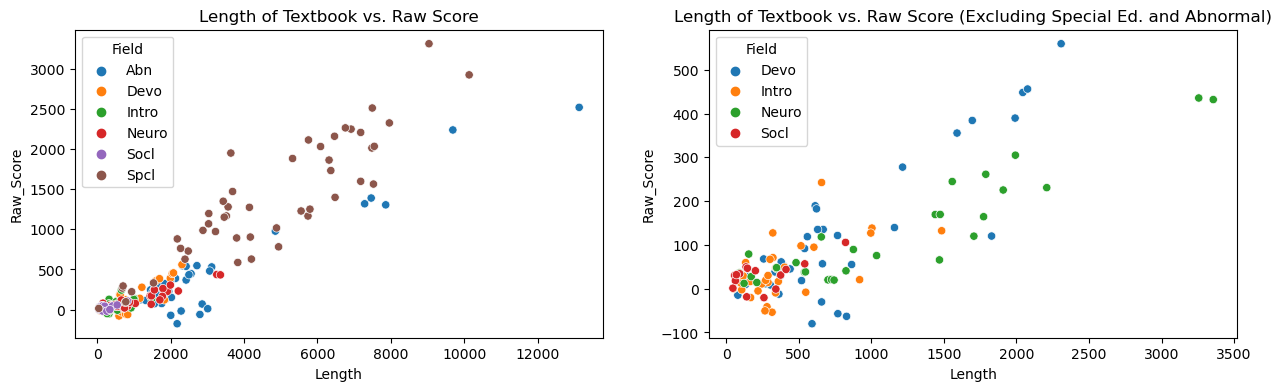

In [13]:
# What about raw scores and length?
os.chdir(results_dir)

raw_df = pd.read_csv("raw_sentiments_01_04_2024.csv", low_memory=False)

print(raw_df)

raw_df["Length"] = length_df["Length"]
raw_df["Field"] = length_df["Field"]

# length_df2 = length_df

# # Add the lengths of the books to the dataframe
# length_df2["Raw_Score"] = raw_df["Raw_Score"].map(books)

# print(length_df2)

# Correlation between score and length?
fig, ax = plt.subplots(1, 2, figsize=(15, 4)) 

sns.scatterplot(ax=ax[0], data=raw_df, x="Length", y="Raw_Score", hue="Field")
ax[0].set_title("Length of Textbook vs. Raw Score")

# Remove special education and abnormal
secondary_df2 = raw_df[raw_df["Field"] != "Spcl"]
tertiary_df2 = secondary_df2[secondary_df2["Field"] != "Abn"]
sns.scatterplot(ax=ax[1], data=tertiary_df2, x="Length", y="Raw_Score", hue="Field")
ax[1].set_title("Length of Textbook vs. Raw Score (Excluding Special Ed. and Abnormal)")

                          Textbook     Score Edition       Author     Slope  \
0     Abn_Barlow_04_Autism_v2.docx  0.170200      04   Abn_Barlow  0.006955   
1     Abn_Barlow_05_Autism_v2.docx  0.174810      05   Abn_Barlow  0.006955   
2     Abn_Barlow_06_Autism_v2.docx  0.151860      06   Abn_Barlow  0.006955   
3        Abn_Barlow_07_Autism.docx  0.181993      07   Abn_Barlow  0.006955   
4        Abn_Barlow_08_Autism.docx  0.201383      08   Abn_Barlow  0.006955   
..                             ...       ...     ...          ...       ...   
203  Spcl_Vaughn_03_Autism_v2.docx  0.236148      03  Spcl_Vaughn  0.008147   
204  Spcl_Vaughn_04_Autism_v2.docx  0.393215      04  Spcl_Vaughn  0.008147   
205  Spcl_Vaughn_05_Autism_v2.docx  0.331434      05  Spcl_Vaughn  0.008147   
206  Spcl_Vaughn_06_Autism_v2.docx  0.332699      06  Spcl_Vaughn  0.008147   
207     Spcl_Vaughn_07_Autism.docx  0.307140      07  Spcl_Vaughn  0.008147   

    Field  Length  Year  
0     Abn    3118  2004  

<Axes: xlabel='Year', ylabel='Score'>

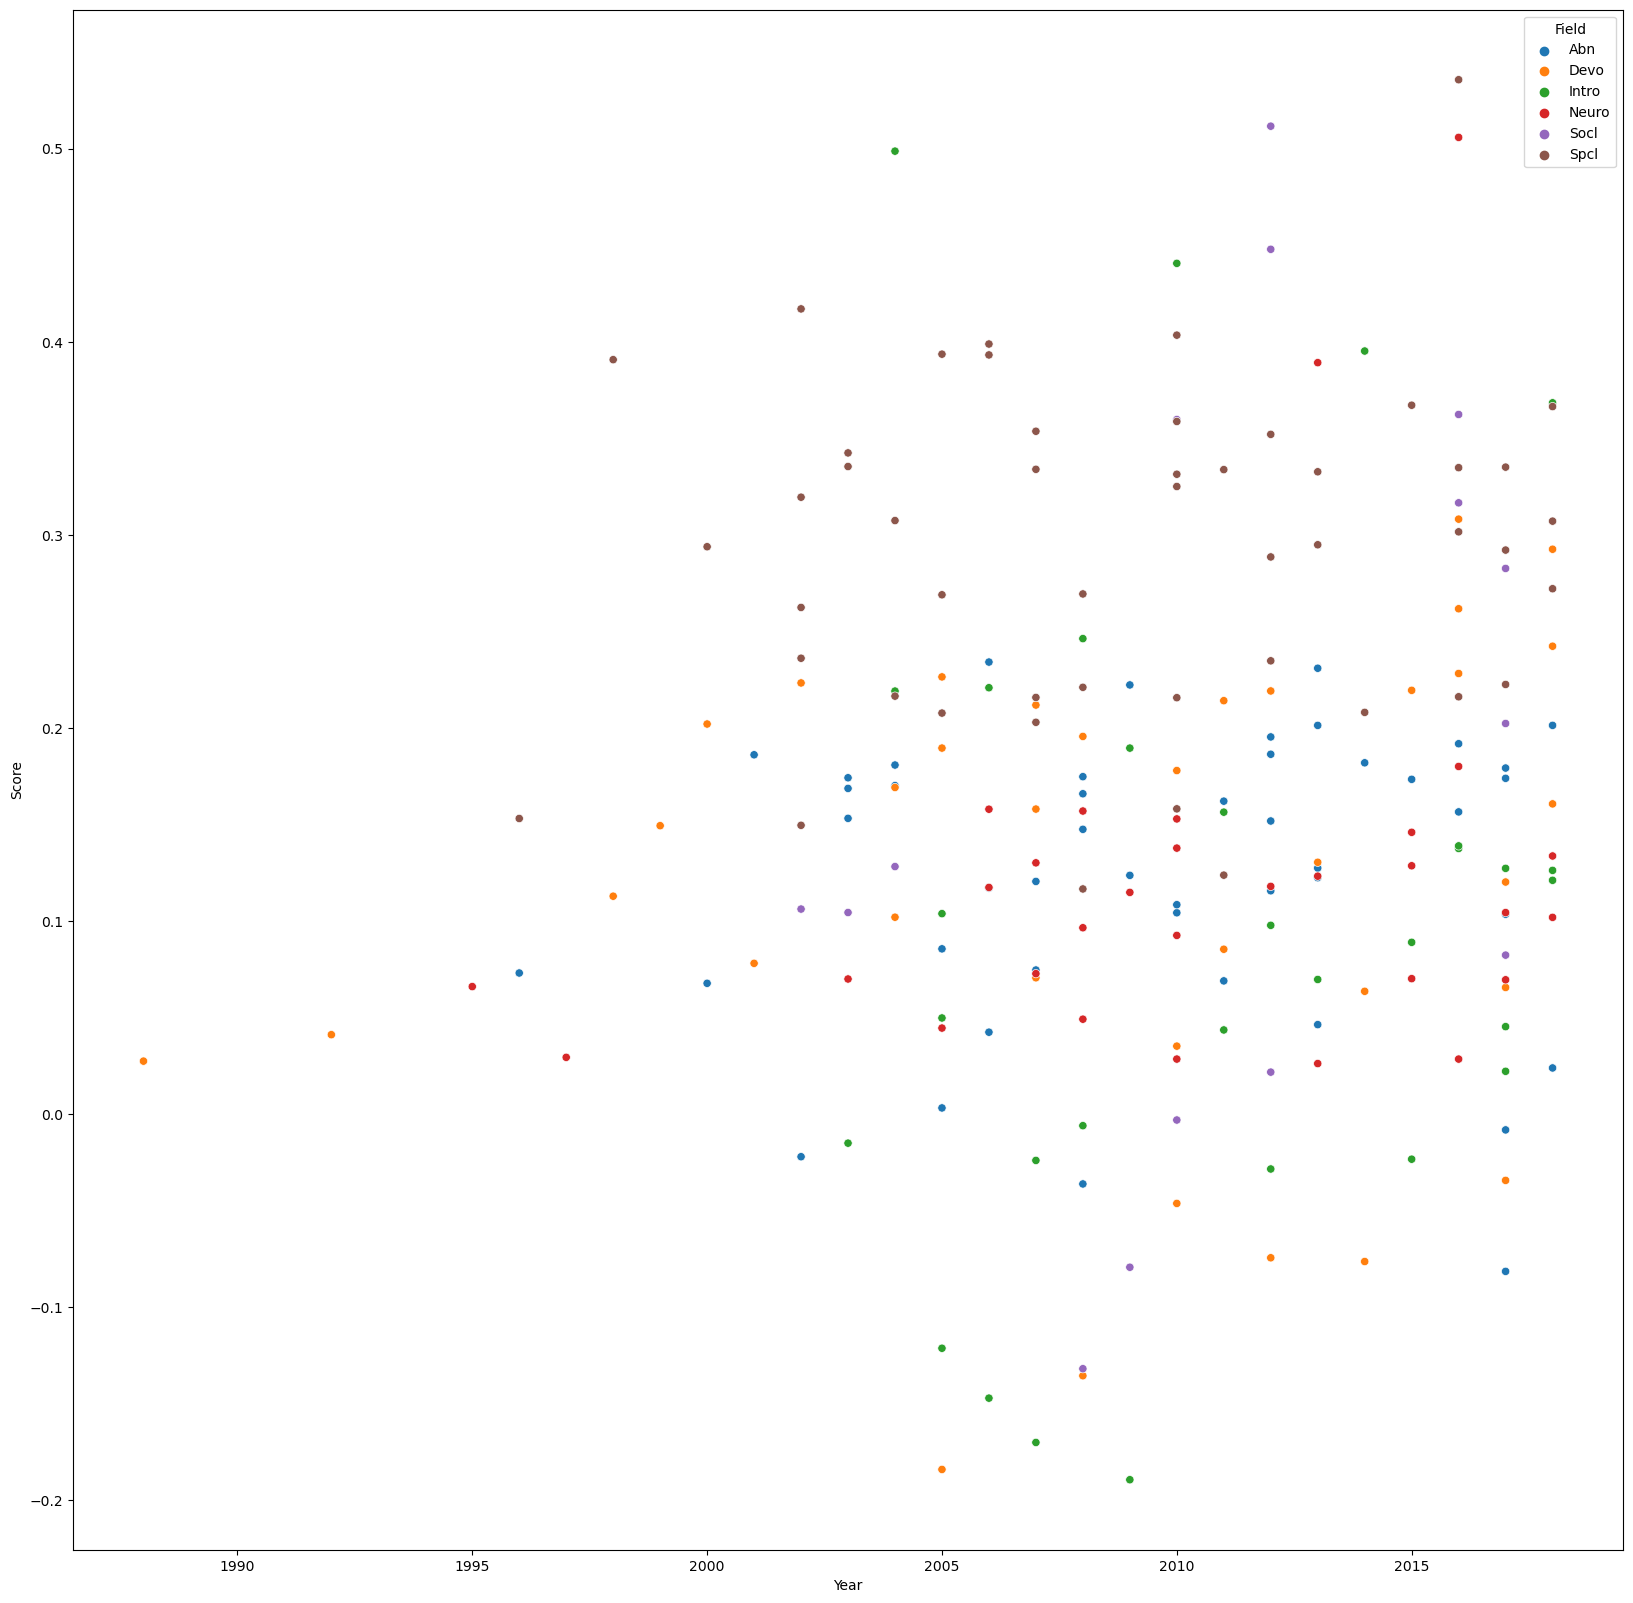

In [14]:
# Overall

overall_df = df

overall_df["Year"] = overall_df["Textbook"].map(book_years)

# # Turn author_means into a dictionary so we can get the fields
# author_means_dict = {}
# for author in author_means:
#     author_means_dict[author[0]] = author[1] 
    
# print(author_means_dict)
    
# overall_df["Field"] = overall_df["Author"].map(author_means_dict)

fields = []
for author in overall_df["Author"]:
    field = author.split("_")[0]
    fields.append(field)

overall_df["Field"] = fields

print(overall_df)

fig, ax = plt.subplots(figsize=(20,20))

sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")